In [1]:
# Step 1: Data Exploration and Understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load data
train_df = pd.read_csv("GUIDE_Train.csv")
test_df = pd.read_csv("GUIDE_Test.csv")

In [3]:

# Initial inspection
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
print(train_df.dtypes)
print(train_df['IncidentGrade'].value_counts(normalize=True))

Train Shape: (9516837, 45)
Test Shape: (4147992, 46)
Id                      int64
OrgId                   int64
IncidentId              int64
AlertId                 int64
Timestamp              object
DetectorId              int64
AlertTitle              int64
Category               object
MitreTechniques        object
IncidentGrade          object
ActionGrouped          object
ActionGranular         object
EntityType             object
EvidenceRole           object
DeviceId                int64
Sha256                  int64
IpAddress               int64
Url                     int64
AccountSid              int64
AccountUpn              int64
AccountObjectId         int64
AccountName             int64
DeviceName              int64
NetworkMessageId        int64
EmailClusterId        float64
RegistryKey             int64
RegistryValueName       int64
RegistryValueData       int64
ApplicationId           int64
ApplicationName         int64
OAuthApplicationId      int64
ThreatFamily     

In [27]:
#Feature Engineering
## 2b: Feature Engineering
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])
train_df['Hour'] = train_df['Timestamp'].dt.hour
train_df['Day'] = train_df['Timestamp'].dt.dayofweek
train_df['Month'] = train_df['Timestamp'].dt.month
train_df['Year'] = train_df['Timestamp'].dt.year
test_df['Hour'] = test_df['Timestamp'].dt.hour
test_df['Day'] = test_df['Timestamp'].dt.dayofweek
test_df['Month'] = test_df['Timestamp'].dt.month
test_df['Year'] = test_df['Timestamp'].dt.year
train_df.drop(columns=['Timestamp'], inplace=True)
test_df.drop(columns=['Timestamp'], inplace=True)


In [28]:
# Step 2: Data Preprocessing
## 2a: Handling Missing Values
missing_percent_train = train_df.isnull().mean() * 100
missing_percent_test = test_df.isnull().mean() * 100
cols_to_drop_train = missing_percent_train[missing_percent_train > 50].index.tolist()
cols_to_drop_test = missing_percent_test[missing_percent_test > 50].index.tolist()

# Drop columns separately based on each dataset's missing threshold
train_df.drop(columns=cols_to_drop_train, inplace=True)
test_df.drop(columns=cols_to_drop_test, inplace=True)


In [29]:
# Fill missing values
num_cols_train = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols_test = test_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols_train = train_df.select_dtypes(include='object').columns.drop('IncidentGrade', errors='ignore')
cat_cols_test = test_df.select_dtypes(include='object').columns

for col in num_cols_train:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
for col in num_cols_test:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

for col in cat_cols_train:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
for col in cat_cols_test:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

In [30]:
train_df['IncidentGrade'].fillna(train_df['IncidentGrade'].mode()[0], inplace=True)
test_df['IncidentGrade'].fillna(test_df['IncidentGrade'].mode()[0], inplace=True)

In [11]:
train_df.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Hour                  0
Day                   0
Month                 0
Year                  0
dtype: int64

In [31]:
# Droping duplicate rows from the dataset
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
print(f"Number of rows after removing duplicates: {train_df.shape[0]}")
print(f"Number of rows after removing duplicates: {test_df.shape[0]}")

Number of rows after removing duplicates: 8970539
Number of rows after removing duplicates: 3922695


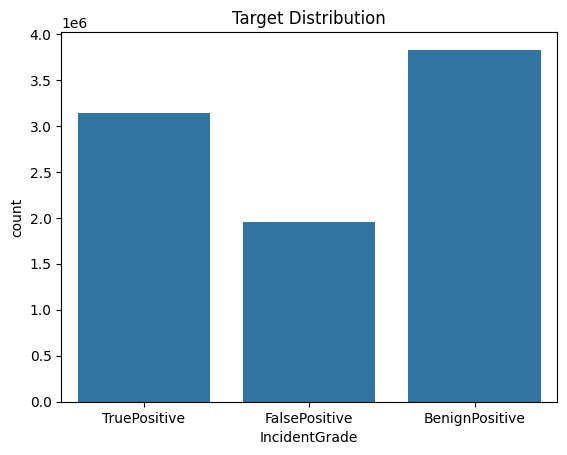

In [14]:
# Step 1b: EDA Analysis
## Univariate Analysis
sns.countplot(x='IncidentGrade', data=train_df)
plt.title("Target Distribution")
plt.show()

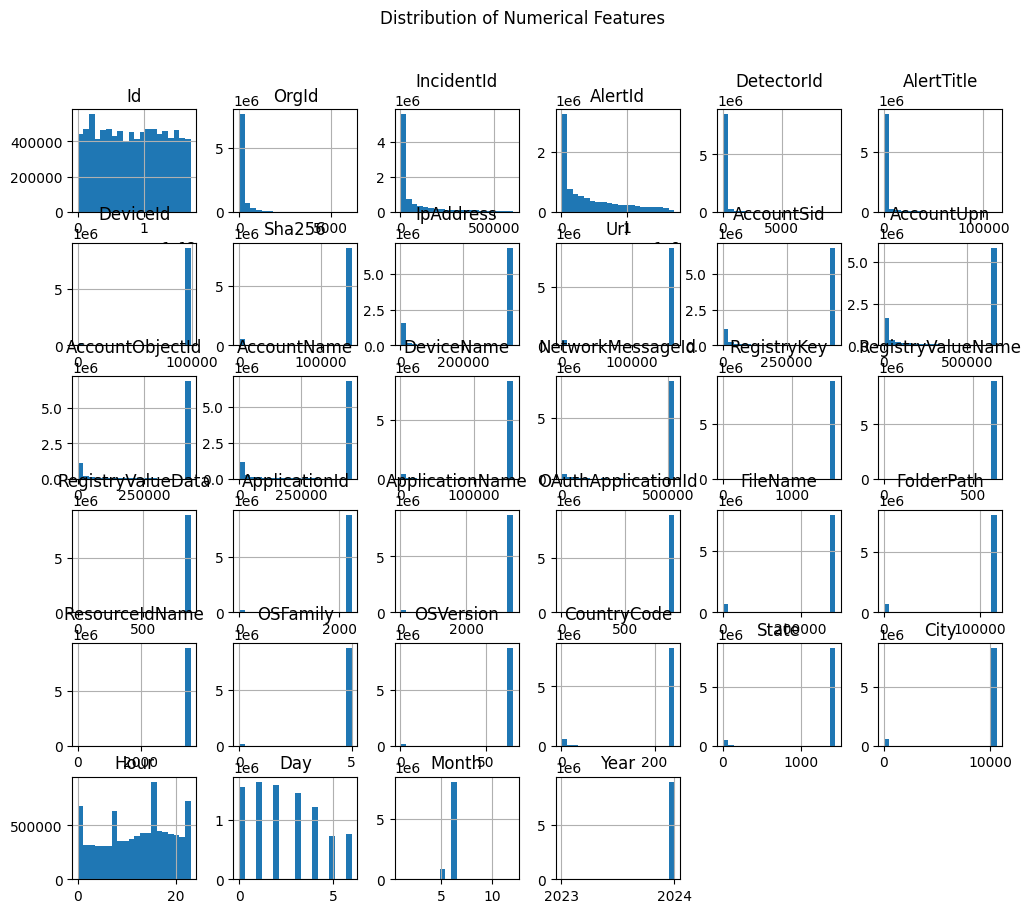

In [32]:
# Feature distributions of numerical column
numerical_features = train_df.select_dtypes(include=['number']).columns
train_df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

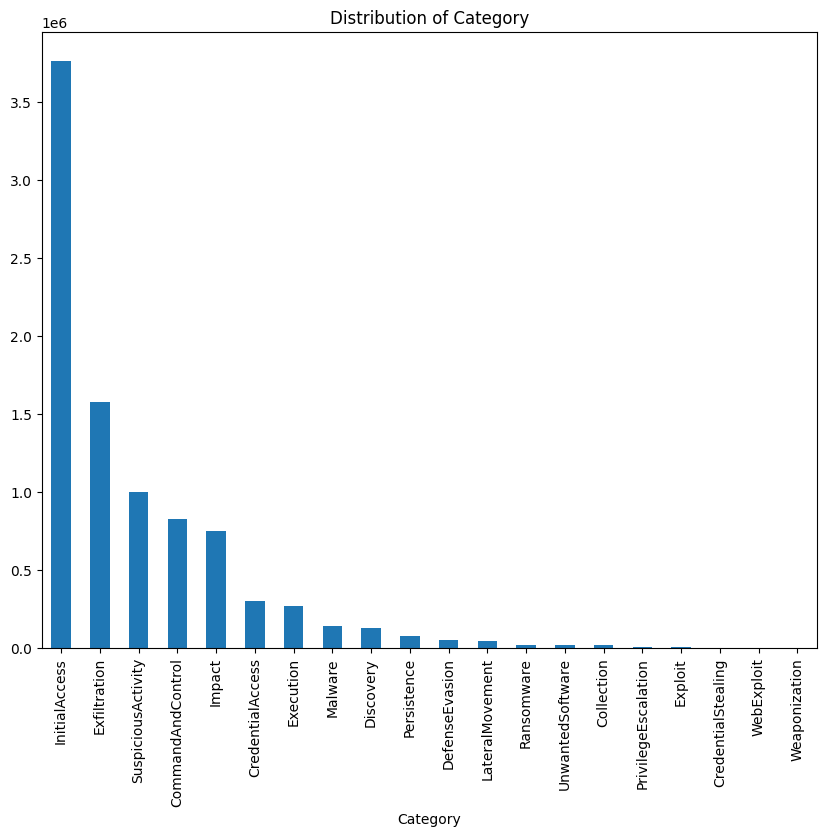

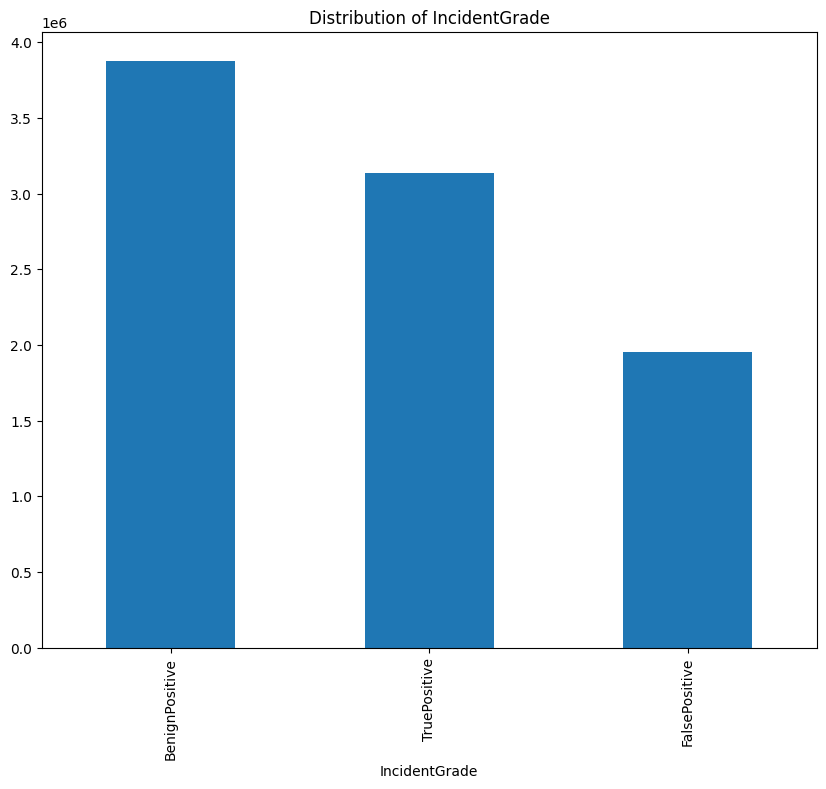

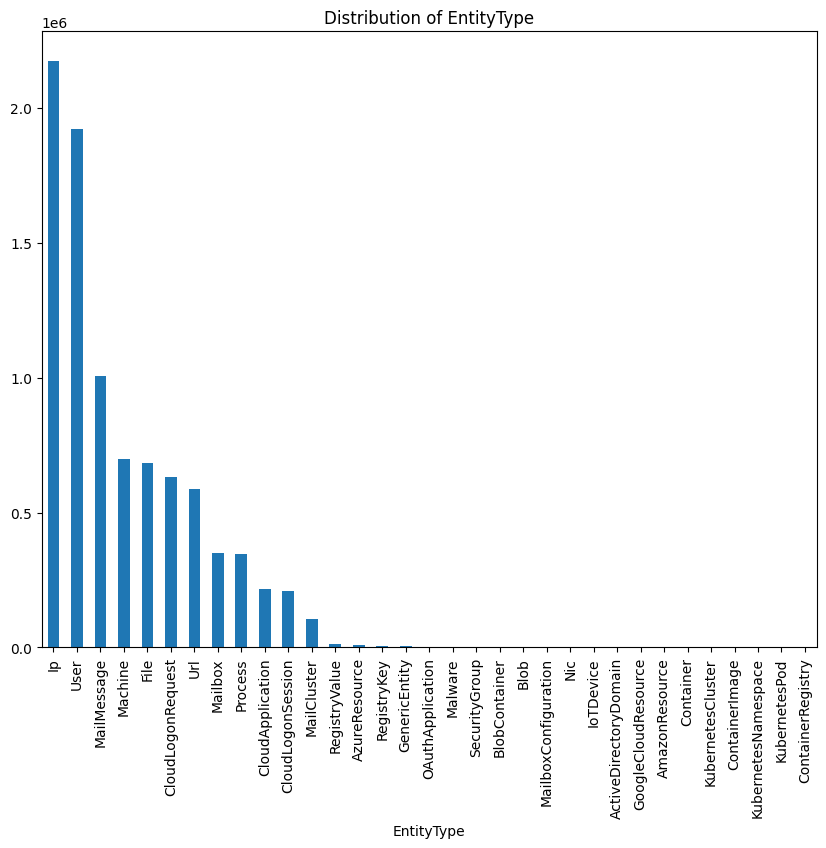

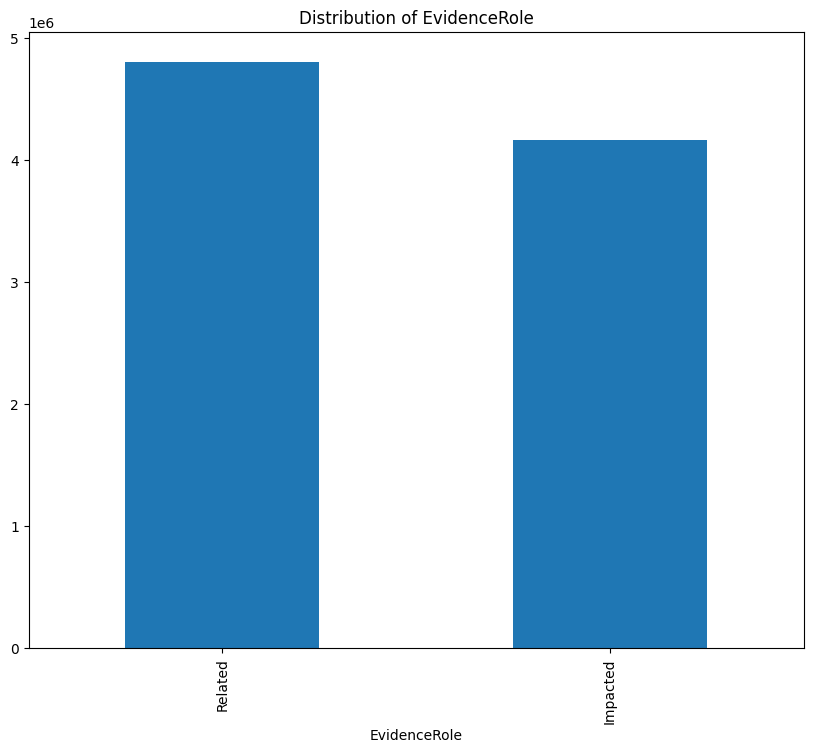

In [33]:
# Bar plot for categorical data
# List of categorical columns in DataFrame
categorical_columns = train_df.select_dtypes(include=['object','category'])

for col in categorical_columns:
    plt.figure(figsize=(10, 8))
    train_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

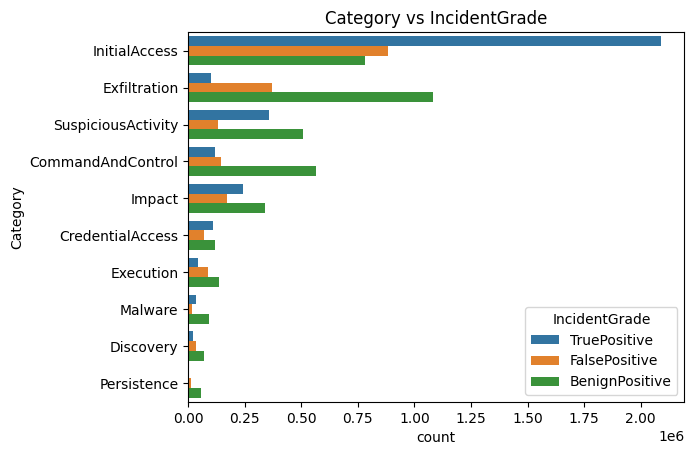

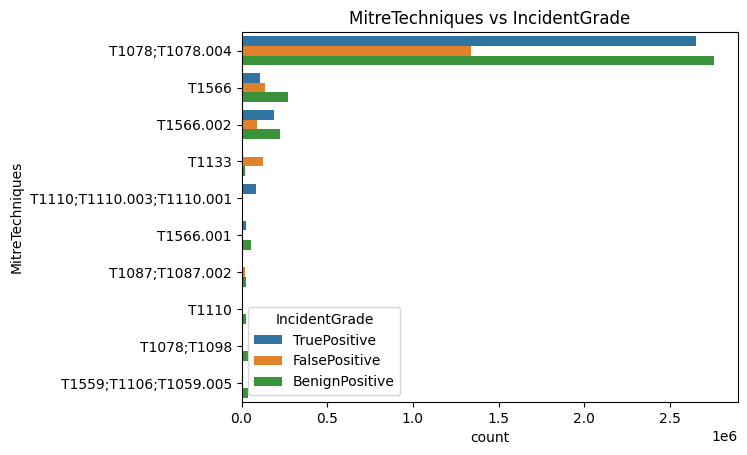

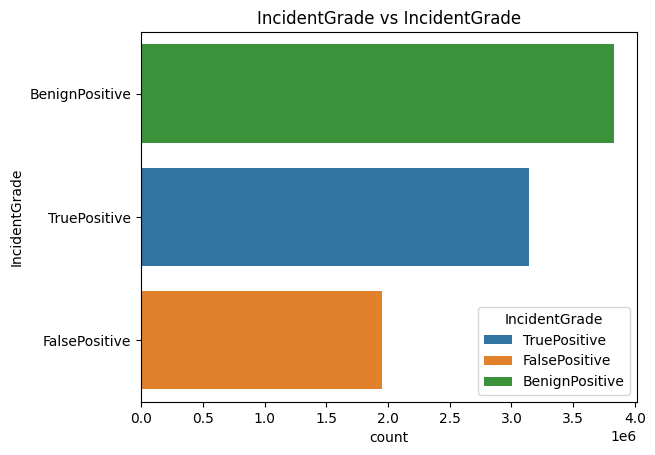

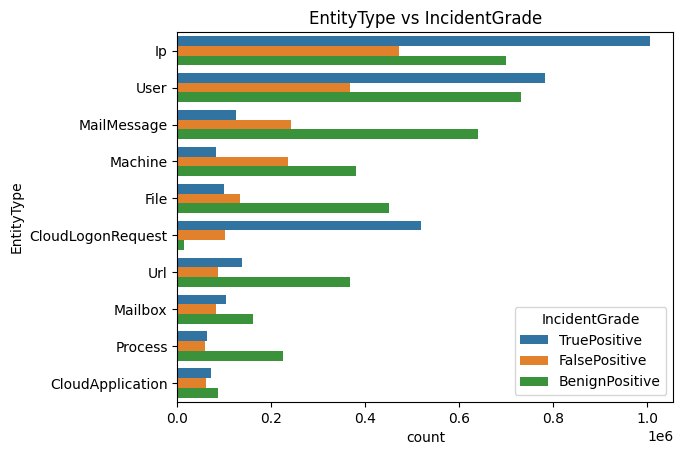

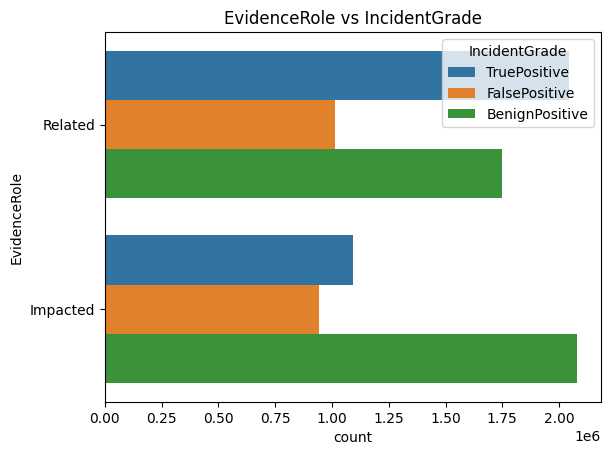

In [21]:
## Bivariate Analysis
for col in categorical_columns[:5]:
    plt.figure()
    sns.countplot(data=train_df, y=col, hue='IncidentGrade', order=train_df[col].value_counts().iloc[:10].index)
    plt.title(f"{col} vs IncidentGrade")
    plt.show()

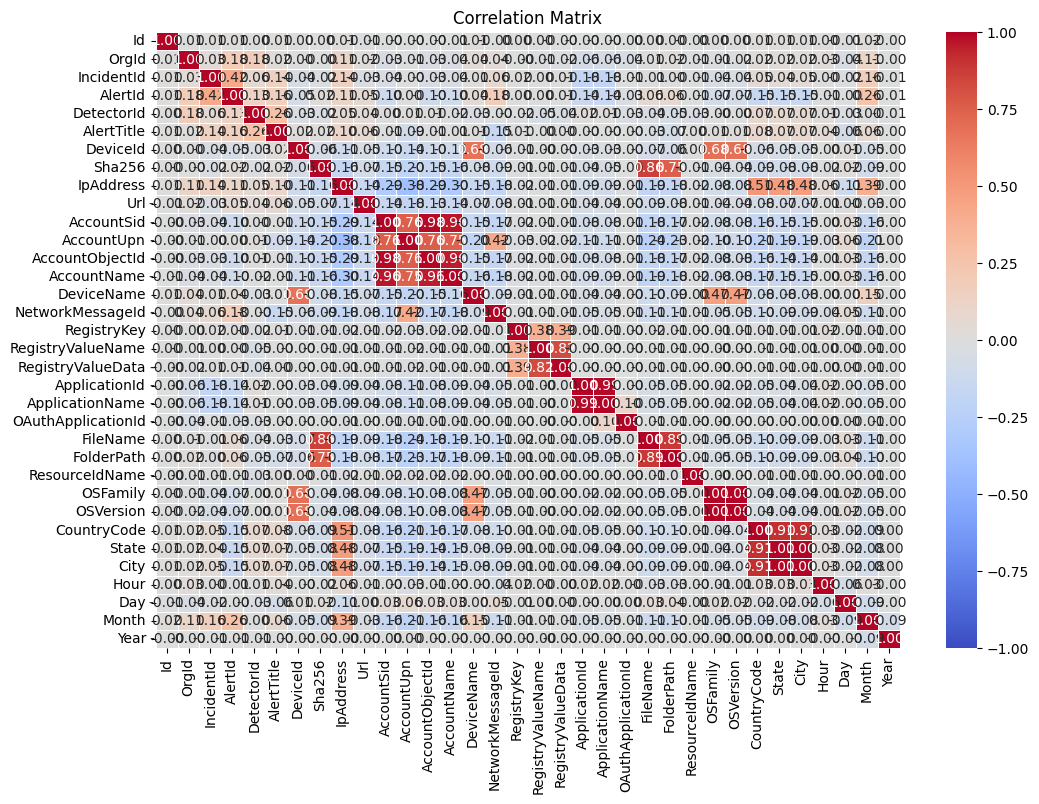

In [23]:
## Multivariate Analysis
corr = train_df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True,fmt='.2f',vmin=-1,linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [34]:
train_df.drop(['AccountName', 'City', 'FolderPath', 'ApplicationName', 'FileName', 'OSVersion', 'AccountObjectId', 'RegistryValueData','State','DetectorId','Id','RegistryKey','OSFamily','CountryCode','Sha256','RegistryValueName','AccountSid','AccountUpn'],axis=1,inplace=True)
test_df.drop(['Usage','AccountName', 'City', 'FolderPath', 'ApplicationName', 'FileName', 'OSVersion', 'AccountObjectId', 'RegistryValueData','State','DetectorId','Id','RegistryKey','OSFamily','CountryCode','Sha256','RegistryValueName','AccountSid','AccountUpn'],axis=1,inplace=True)

In [35]:

# Encode target
target_map = {'TruePositive': 0, 'BeingPositive': 1, 'FalsePostive': 2}
train_df['IncidentGrade'] = train_df['IncidentGrade'].map(target_map)
test_df['IncidentGrade'] = test_df['IncidentGrade'].map(target_map)

In [36]:
## 2c: Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if set(test_df[col]).issubset(set(le.classes_)):
        test_df[col] = le.transform(test_df[col])
    else:
        # Handle unseen labels in test data
        le_classes = list(le.classes_)
        le_classes.extend(list(set(test_df[col]) - set(le.classes_)))
        le.classes_ = np.array(le_classes)
        test_df[col] = le.transform(test_df[col])

   





In [37]:
#separate dependent and independent variable
x= train_df.drop('IncidentGrade', axis=1)
y = train_df['IncidentGrade']

In [38]:
y

0          0
1          1
2          1
3          1
4          0
          ..
9516832    0
9516833    1
9516834    1
9516835    1
9516836    1
Name: IncidentGrade, Length: 8970539, dtype: int64

In [16]:
x

,OrgId,IncidentId,AlertId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,IpAddress,Url,DeviceName,NetworkMessageId,ApplicationId,OAuthApplicationId,ResourceIdName,Hour,Day,Month,Year
0,0,612,123247,6,10,15,1,98799,27,160396,153085,529644,2251,881,3586,6,1,6,2024
1,88,326,210035,43,7,32,0,98799,360606,160396,153085,529644,2251,881,3586,3,4,6,2024
2,809,58352,712507,298,10,31,1,98799,360606,68652,153085,529644,2251,881,3586,4,3,6,2024
3,92,32992,774301,2,1,31,1,98799,360606,13,153085,529644,2251,881,3586,16,0,6,2024
4,148,4359,188041,74,6,32,0,98799,360606,160396,153085,529644,2251,881,3586,1,5,6,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,0,90,496631,6,10,6,1,98799,360606,160396,153085,529644,2251,881,3586,15,5,6,2024
9516833,59,196410,748366,2,1,31,1,98799,360606,164,153085,529644,2251,881,3586,9,3,6,2024
9516834,44,14117,7425,57,7,21,0,98799,360606,160396,153085,22919,2251,881,3586,22,1,6,2024
9516835,43,644,8973,10,9,15,1,98799,465,160396,153085,529644,2251,881,3586,23,0,5,2024


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
# Step 4: Model Selection and Training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


In [41]:
# 4a: Baseline Models
lr = LogisticRegression()
lr.fit(x_train,y_train)



LogisticRegression()

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
# 4b: Advanced Models
rf_best = RandomForestClassifier(criterion='entropy',n_estimators=100,min_samples_split=2, min_samples_leaf=3,max_depth=10,max_features='sqrt',random_state=40,max_leaf_nodes=40)
rf_best.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=40,
                       min_samples_leaf=3, random_state=40)

In [44]:
#Initialize Gradientboost classifier model
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100,min_samples_split=2, min_samples_leaf=3,max_depth=10,max_features='sqrt',random_state=40,max_leaf_nodes=40)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=40,
                           min_samples_leaf=3, random_state=40)

In [45]:

xgb_best = XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=40,n_jobs=-1,max_depth=8)
xgb_best.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=40, ...)

In [46]:
import lightgbm
lightgbm_model=LGBMClassifier(n_estimators=100,learning_rate=0.1,random_state=40,n_jobs=1,max_depth=8)
lightgbm_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 4664604, number of negative: 2511827
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.199202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2491
[LightGBM] [Info] Number of data points in the train set: 7176431, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649989 -> initscore=0.618993
[LightGBM] [Info] Start training from score 0.618993


LGBMClassifier(max_depth=8, n_jobs=1, random_state=40)

In [47]:
models = {'LogReg': lr, 'DecisionTree': dt, 'RF_Best': rf_best,'Gradientboosting':gbc,'XGB_Best': xgb_best,'lightgbm':lightgbm_model}
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=3, scoring='f1_macro')
    print(f"{name} - F1 Macro: {scores.mean():.4f} +/- {scores.std():.4f}")


LogReg - F1 Macro: 0.6706 +/- 0.0088
DecisionTree - F1 Macro: 0.9964 +/- 0.0001
RF_Best - F1 Macro: 0.8387 +/- 0.0069
Gradientboosting - F1 Macro: 0.9174 +/- 0.0059
XGB_Best - F1 Macro: 0.9358 +/- 0.0058
[LightGBM] [Info] Number of positive: 3886942, number of negative: 2093417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.988685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 5980359, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649951 -> initscore=0.618825
[LightGBM] [Info] Start training from score 0.618825
[LightGBM] [Info] Number of positive: 3886942, number of negative: 2093417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.087248 seconds.
You can set `force_row_wise=true` to remove the overhea

In [48]:
# Step 5: Evaluation
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
def evaluate(model, name):
    y_pred = model.predict(x_val)
    print(f"\n{name} Classification Report")
    print(classification_report(y_val, y_pred))
    print("Accuracy:",accuracy_score(y_val, y_pred))
    print("Macro F1:", f1_score(y_val, y_pred, average='macro'))
    print("Precision:", precision_score(y_val, y_pred, average='macro'))
    print("Recall:", recall_score(y_val, y_pred, average='macro'))
    


In [49]:
evaluate(lr, "logReg")
evaluate(dt, "Decisiontree")
evaluate(gbc, "Gradientboosting")
evaluate(rf_best, "Random Forest")
evaluate(xgb_best, "XGBoost")
evaluate(lightgbm_model, "lightgbm")


logReg Classification Report
              precision    recall  f1-score   support

           0       0.72      0.40      0.51    628299
           1       0.74      0.92      0.82   1165809

    accuracy                           0.74   1794108
   macro avg       0.73      0.66      0.67   1794108
weighted avg       0.73      0.74      0.71   1794108

Accuracy: 0.7361000564068607
Macro F1: 0.6663710440750878
Precision: 0.7314958873418791
Recall: 0.6582144162721748

Decisiontree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628299
           1       1.00      1.00      1.00   1165809

    accuracy                           1.00   1794108
   macro avg       1.00      1.00      1.00   1794108
weighted avg       1.00      1.00      1.00   1794108

Accuracy: 0.997654544765421
Macro F1: 0.9974232432721315
Precision: 0.9974265287324109
Recall: 0.9974199580758484

Gradientboosting Classification Report
           

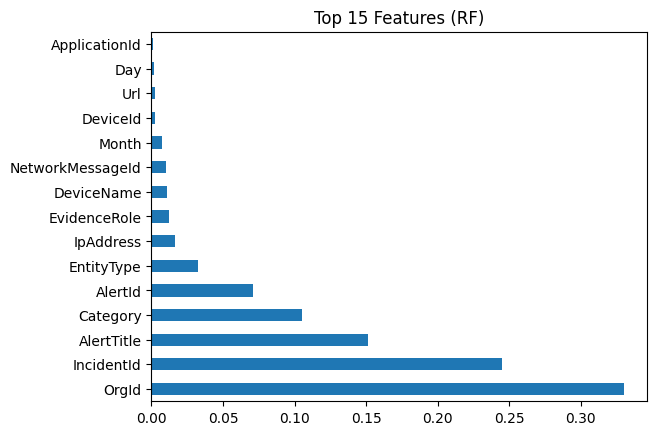

In [31]:
# Step 6: Model Interpretation
importances = pd.Series(rf_best.feature_importances_, index=x_train.columns)
importances.nlargest(15).plot(kind='barh', title='Top 15 Features (RF)')
plt.show()


In [35]:

# Handle object-type column 'Usage'
if 'Usage' in test_df.columns and test_df['Usage'].dtype == 'object':
    test_df['Usage'] = test_df['Usage'].astype(str)
    test_df['Usage'] = LabelEncoder().fit_transform(test_df['Usage'])

In [50]:
X_test=test_df.drop('IncidentGrade',axis=1)
final_preds = xgb_best.predict(X_test)
y_test_true = test_df['IncidentGrade'] 

In [51]:
print("Final Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test_true, final_preds))
print("Macro F1:", f1_score(y_test_true, final_preds, average='macro'))
print("Precision:", precision_score(y_test_true, final_preds, average='macro'))
print("Recall:", recall_score(y_test_true, final_preds, average='macro'))



Final Test Set Evaluation:
Accuracy: 0.9367822377217704
Macro F1: 0.9295323916780951
Precision: 0.946536501962872
Recall: 0.917910003077222


In [52]:
inv_map = {v: k for k, v in target_map.items()}
final_labels = [inv_map[i] for i in final_preds]
pd.DataFrame({'PredictedIncidentGrade': final_labels}).to_csv('final_predictions.csv', index=False)

In [53]:
# Create a copy of test_df to preserve the original
X_test_final = test_df.copy()

# Drop target column only from the copy if present
if 'IncidentGrade' in X_test_final.columns:
    y_test_true = X_test_final['IncidentGrade']
    X_test_final = X_test_final.drop(columns=['IncidentGrade'])
else:
    y_test_true = None

# Align features to match training data
X_test_final = X_test_final[x_train.columns]

# Make predictions
final_preds = xgb_best.predict(X_test_final)

In [54]:
if y_test_true is not None:
    print("Final Test Set Evaluation:")
    print("Accuracy:", accuracy_score(y_test_true, final_preds))
    print("Macro F1:", f1_score(y_test_true, final_preds, average='macro'))
    print("Precision:", precision_score(y_test_true, final_preds, average='macro'))
    print("Recall:", recall_score(y_test_true, final_preds, average='macro'))
inv_map = {v: k for k, v in target_map.items()}
final_labels = [inv_map[i] for i in final_preds]
pd.DataFrame({'PredictedIncidentGrade': final_labels}).to_csv('final_predictions_1.csv', index=False)

Final Test Set Evaluation:
Accuracy: 0.9367822377217704
Macro F1: 0.9295323916780951
Precision: 0.946536501962872
Recall: 0.917910003077222


In [55]:
# Compare to baseline (Logistic Regression)
y_pred_baseline = lr.predict(x_val)
evaluate(lr, "Logistic Regression (Baseline)")
evaluate(xgb_best, "XGBoost (Final Model)")



Logistic Regression (Baseline) Classification Report
              precision    recall  f1-score   support

           0       0.72      0.40      0.51    628299
           1       0.74      0.92      0.82   1165809

    accuracy                           0.74   1794108
   macro avg       0.73      0.66      0.67   1794108
weighted avg       0.73      0.74      0.71   1794108

Accuracy: 0.7361000564068607
Macro F1: 0.6663710440750878
Precision: 0.7314958873418791
Recall: 0.6582144162721748

XGBoost (Final Model) Classification Report
              precision    recall  f1-score   support

           0       0.98      0.85      0.91    628299
           1       0.93      0.99      0.96   1165809

    accuracy                           0.94   1794108
   macro avg       0.95      0.92      0.94   1794108
weighted avg       0.95      0.94      0.94   1794108

Accuracy: 0.9437347138522318
Macro F1: 0.9361261666705734
Precision: 0.9545952452718247
Recall: 0.9231980297075507


In [ ]:
print("Final Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test_true, final_preds))
print("Macro F1:", f1_score(y_test_true, final_preds, average='macro'))
print("Precision:", precision_score(y_test_true, final_preds, average='macro'))
print("Recall:", recall_score(y_test_true, final_preds, average='macro'))

In [ ]:
# 4b: Advanced Models with tuning
rf = RandomForestClassifier(class_weight='balanced')
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1_macro')
rf_grid.fit(x_train, y_train)
rf_best = rf_grid.best_estimator_


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 21 columns):
 #   Column              Dtype
---  ------              -----
 0   OrgId               int64
 1   IncidentId          int64
 2   AlertId             int64
 3   AlertTitle          int64
 4   Category            int64
 5   IncidentGrade       int64
 6   EntityType          int64
 7   EvidenceRole        int64
 8   DeviceId            int64
 9   IpAddress           int64
 10  Url                 int64
 11  DeviceName          int64
 12  NetworkMessageId    int64
 13  ApplicationId       int64
 14  OAuthApplicationId  int64
 15  ResourceIdName      int64
 16  Usage               int64
 17  Hour                int32
 18  Day                 int32
 19  Month               int32
 20  Year                int32
dtypes: int32(4), int64(17)
memory usage: 598.6 MB


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
xgb_grid = RandomizedSearchCV(xgb, xgb_params, cv=5, scoring='f1_macro', n_iter=5)
xgb_grid.fit(x_train, y_train)
xgb_best = xgb_grid.best_estimator_


In [ ]:
# 4c: Cross-Validation Results
models = {'LogReg': lr, 'DecisionTree': dt, 'RF_Best': rf_best, 'XGB_Best': xgb_best}
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='f1_macro')
    print(f"{name} - F1 Macro: {scores.mean():.4f} +/- {scores.std():.4f}")

In [ ]:
# Step 5: Evaluation
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
def evaluate(model, name):
    y_pred = model.predict(x_val)
    print(f"\n{name} Classification Report")
    print(classification_report(y_val, y_pred))
    print("Macro F1:", f1_score(y_val, y_pred, average='macro'))
    print("Precision:", precision_score(y_val, y_pred, average='macro'))
    print("Recall:", recall_score(y_val, y_pred, average='macro'))


In [ ]:

evaluate(rf_best, "Random Forest")
evaluate(xgb_best, "XGBoost")


In [ ]:
# Step 6: Model Interpretation
importances = pd.Series(rf_best.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh', title='Top 15 Features (RF)')
plt.show()
